# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [6]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [7]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [8]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 495


### 3. Distinct Affiliations

In [9]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 176 occurences
Studia Universitas Babes-Bolyai : 13 occurences
Studia Universitatis "Babes-Bolyai" : 13 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
International Journal of Computers : 7 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Knowledge Engineering: Principles and Techniques : 4 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences
The International Journal of Information Technology and Intelligent Computing : 2 occurences
EuroGP2006 & EvoCOP2006 : 2 occurences
Acta Universitatis Apulensis : 2 occurences
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics : 2 occurences
the 2016 IEEE 12th International Conference on Intelligent Comp

In [10]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st International Conference on Software Engine

In [11]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
International Journal on Artificial Intelligence Tools (IJAIT)
The International Journal of Information Technology and Intelligent Computing
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [12]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitas',
 'Babes-Bolyai',
 'Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'International',
 'Journal',
 'of',
 'Computers',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tools',
 '(IJAIT)',
 'Applied',
 'Soft',
 'Computing',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 'Technology',
 'and',
 'Intelligent',
 'Computing',
 'EuroGP2006',
 '&',
 'EvoCOP2006',
 'Acta',
 'Universitatis',
 'Apulensis',
 'MECO45',
 '45th',
 'Conference',
 'of',
 'the',
 'Middle',
 'European',
 'Cooperation',
 'in',
 'Statistical',


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1091)>


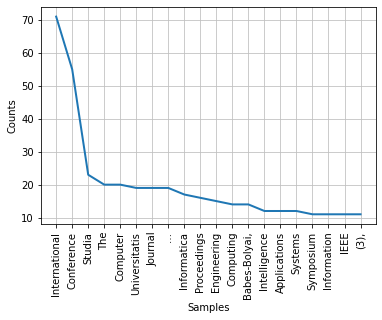

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [14]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [17]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [18]:
print(vectorizer.get_feature_names())

['10', '17th', '1985', '1996', '1999', '2007', '2009', '2014', '2015', '3d', 'abordari', 'about', 'academic', 'accelerate', 'acceleration', 'accelerometer', 'access', 'according', 'accurate', 'acknowledgement', 'aco', 'acquired', 'acrylonitrile', 'action', 'active', 'activitatii', 'activities', 'activity', 'actuala', 'adapting', 'adaptive', 'additional', 'administration', 'advanced', 'agent', 'agenti', 'agentilor', 'agents', 'aggregated', 'aggregation', 'agile', 'algorithm', 'algorithmic', 'algorithms', 'algoritmi', 'alignement', 'aligning', 'alignment', 'alteration', 'alterations', 'american', 'an', 'anal', 'analogy', 'analysing', 'analysis', 'analytics', 'analyze', 'ancient', 'and', 'android', 'answer', 'ant', 'antioxidant', 'ants', 'ap041', 'aplicati', 'aplicatii', 'aplicatiile', 'aport', 'applicability', 'application', 'applications', 'applied', 'applying', 'apport', 'appraisal', 'apprentissage', 'approach', 'approaches', 'approche', 'architecture', 'architectures', 'are', 'arrest'

In [19]:
print(X.shape)

(495, 1124)


In [20]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [22]:
import pandas as pd

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,10,17th,1985,1996,1999,2007,2009,2014,2015,3d,...,workbench,workflow,wrist,writing,wyliodrin,xml,year,zsuzsanna,évolutive,în
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1091)>


,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,2-4,2007,2009,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,2-4,2007,2009,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(word, row)

'inteligenta 0.3812637753306267
1 0.5434940441646108
10 0.5214335478203574
10 0.6038531075510472
17th 0.32914617788207995
1985–1996 0.2989052664646076
1999 0.2695032428471318
1999-molecular 0.2695032428471318
2-4 0.3148101712953743
2007 0.4318451227125261
2009 0.6296203425907486
2014 0.5448176610889562
2015 0.5448176610889562
3d 0.3724182909804794
7 0.46235576926605115
abordari 0.36472321970911414
academ 0.3314246487735438
academ 0.30594924509787547
acceler 0.5350838376517454
acceler 0.4120700140540922
acceleromet 0.4467049641774702
access 0.40256593114927375
accord 0.30686289686071616
accur 0.45960914572411193
acknowledg 0.3601748679678963
aco 0.48129087829074924
acquir 0.3865352337071557
acquir 0.41222058740882944
acrylonitril 0.489897850006813
action 0.4324646069729114
action 0.41228839659005706
activ 0.23103850399884912
activ 0.36502268433793833
activ 0.24564198191988443
activ 0.38417202178789883
activ 0.30309376417002265
activ 0.334672607610936
activ 0.32182580902575264
activ 0.33

descriptor 0.3797103452230527
descriptor 0.426243000419157
descriptor 0.5322393772340452
design 0.4439643321790272
design 0.20199325227160306
design 0.29233929523860375
design 0.2996857846504983
design 0.3153741875808939
design 0.35782432866541586
design 0.31926918790640973
design 0.30902537564435545
design 0.4507287622722444
design 0.4079341996618394
design 0.4167584406665942
design 0.4918544108000738
design 0.3291601516547755
design 0.5228594651164716
design 0.36863233323543615
design 0.31603908927012314
design 0.23453655274807025
design 0.24067139190308204
design 0.4377404489390341
design 0.3329817615837577
design 0.36368877616222994
design 0.3079574631393312
design 0.28996236411557197
design 0.30505773925321295
design 0.4243177552371859
design 0.43275793580071215
design 0.3193785814805193
design 0.36368877616222994
design 0.2812501716811963
desir 0.5730501785266149
desir 0.4889776862052177
detect 0.29814194791120213
detect 0.40393539932182665
detect 0.3227349482046408
detect 0.3057

learn 0.293030688718177
learn 0.3750022281638978
learn 0.34163642404683253
learn 0.2696182396364178
learn 0.29544001963602
learn 0.33472567195898095
learn 0.3464613744246826
learn 0.2747242092381781
learn 0.26138208716912575
learn 0.3395920010050218
learn 0.34240090642957627
learner 0.3727981965978153
licenc 0.4699584439537419
life 0.3793011691451263
light 0.5029536159739447
light 0.4892823390576049
light 0.47115683953468296
limbajul 0.33993759381217487
linear 0.4669863303101422
linear 0.5298293442246814
liquid 0.30686289686071616
lisp 0.39112292779775454
live 0.3841629428046586
live 0.37026070371433717
live 0.46582995319324316
liver 0.340513191943544
liver 0.340513191943544
load 0.4014415666156863
local 0.4908058883780961
localis 0.4762796772298998
locat 0.5238226383284043
locuinţ 0.45939102163992396
log 0.4449643742031299
logic 0.49969033269472873
logic 0.6981601583544809
logist 0.5447876128796999
luminair 0.44663096249859235
luminair 0.3885617713502158
m 0.30894629500088955
m 0.2941

sampl 0.33275331017566595
sampl 0.4331039283825382
sau 0.3268972416705251
scalabl 0.4447399868918284
scale 0.4142048574349236
scale 0.29724829822760923
scale-fre 0.35342561980215115
scene 0.3656993284716706
scene 0.42538628481771174
schedul 0.2832480501033279
schedul 0.4855236210905315
schedul 0.41179582186073554
search 0.3989694006358925
search 0.4236537400531138
search 0.39707002260406915
search 0.28432674100570793
search 0.3419783537708476
search 0.32998210234772046
search 0.3730864312132992
search 0.34330477227838097
search 0.33548768477025415
search 0.3024545448663199
search 0.4750040996757353
search 0.32224325795133457
search 0.3558438369062515
search 0.3271399068620513
search 0.42571059284800816
search 0.3958222730962954
seed 0.6514423240835867
segment 0.27608660956267833
segment 0.24804130216816064
segment 0.2938548155765297
segment 0.3623491590161088
segment 0.27494591570693777
segment 0.4138456143558406
segment 0.3630257047988643
segment 0.44283325845476496
segment 0.35290562

In [27]:
from sklearn.cluster import KMeans

In [28]:
number_of_clusters = 10

In [29]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [30]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [31]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: cellular automata imag evolv comput
Cluster 1: program intellig model use base
Cluster 2: fuzzi case regress classif chemic
Cluster 3: learn protein structur predict reinforc
Cluster 4: cluster softwar hierarch fuzzi refactor
Cluster 5: design distribut multi-ag manag collabor
Cluster 6: compon select problem princip analysi
Cluster 7: sensit problem solv ant optim
Cluster 8: analysi educ web concept platform
Cluster 9: evolutionari network complex commun detect


In [32]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [33]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  Collaborative evolutionary search for density classification in cellular automata,
0  ---  Collaborative search operators for evolutionary approaches to density classification in cellular automata
0  ---  Evolving Cellular Automata for Two stage Edge Detection
0  ---  Towards the Efficient Evolution of Particle-Based Computation in Cellular Automata,
0  ---  Using a Hybrid Cellular Automata Topology and Neighborhood in Rule Discovery,
0  ---  Enhancing the Computational Mechanics of Cellular Automata,
0  ---  Cellular Computing using Cellular Neural Networks – a survive
0  ---  Avenues for the Use of Cellular Automata In Image Processing
0  ---  Interval{state cellular automata and their applications to image segmentation
0  ---  Parameterized Cellular Automata in Image Segmentation
0  ---  Cell state change dynamics in cellular automata
0  ---  Network Topologies for Cellular Automata Computation
0  ---  Predictability in Cellular Automata
0  ---  Exploring Various Neighborhoo

9  ---  Multi-objective Evolutionary Traffic Assignment
9  ---  Scalable QoS routing in MPLS networks using mobile code
9  ---  Modern routing techniques for future QoS enabled networks
9  ---  A proposed architecture for integrating Active Networks and MPLS
9  ---  Evolutionary community detection in complex and dynamic networks 
9  ---  Active Networks and MPLS integration for better access networks: Framework and Applicability
9  ---  Bandwidth Management in MPLS Networks
9  ---  Best-order crossover for permutation-based evolutionary algorithms
9  ---  Evolutionary coalition formation in full connected and scale free networks
9  ---  A Collaborative Evolutionary Approach to Resource-Constrained Project Scheduling
9  ---  The Role of Crossover in Evolutionary Approaches to Resource-Constrained Project Scheduling,
9  ---  Evolutionary Optimisation of Kernel Functions for SVMs
9  ---  Evolutionary Coalition Formation in Complex Networks
9  ---  Complex Dynamics in an Evolutionary Asyn

In [35]:
### GENSIM

In [44]:
from gensim.models import word2vec
from gensim.test.utils import common_texts, get_tmpfile

In [80]:
tokenized_sentences = [[j.lower() for j in st.split() if j not in stopwords.words('english')] for st in corpus]

In [81]:
model = word2vec.Word2Vec(tokenized_sentences, min_count=1)

In [82]:
model.save("word2vec.model")

In [83]:
model = word2vec.load("word2vec.model")

AttributeError: module 'gensim.models.word2vec' has no attribute 'load'

In [84]:
model

In [85]:
model.wv["study"]

array([-4.8509361e-03, -1.7841884e-03,  9.0206740e-04,  2.8352342e-03,
       -4.4405470e-03,  3.8822354e-03, -4.5096106e-03,  8.3476509e-04,
       -3.8830196e-03,  2.9395637e-03, -3.2952268e-04,  2.7706483e-03,
        1.1974509e-03,  1.1630215e-03,  4.9650953e-03,  3.6260899e-04,
       -5.7681062e-04, -1.0871609e-03,  2.7701415e-03, -6.1106140e-04,
       -4.1394806e-03, -4.0107248e-03, -1.2608401e-03,  4.6064178e-03,
       -9.5070229e-04, -1.3107820e-03,  4.9753948e-03, -4.6827474e-05,
       -5.0584099e-04, -2.8157071e-03,  1.9184900e-03,  4.5886836e-03,
       -2.5869727e-03,  2.3785485e-03,  3.3920927e-03, -3.1405818e-03,
        3.3853091e-03,  3.0647435e-03,  1.3942769e-03, -6.9071876e-04,
       -2.6365672e-03,  1.3369333e-03,  2.1101129e-03, -3.6375639e-03,
        3.8835155e-03,  2.7973019e-03, -2.2170926e-03,  1.4039988e-03,
       -3.9182251e-04, -1.3597109e-03,  2.3753555e-03,  2.8891962e-03,
        3.8056744e-03,  3.8972574e-03,  3.7790847e-03, -2.6779305e-03,
      

In [86]:
words = list(model.wv.vocab)

In [87]:
print(words)

['a', 'comparative', 'study', 'software', 'architectures', 'mobile', 'applications', 'the', 'use', 'simple', 'cellular', 'automata', 'image', 'processing', 'support', 'vector', 'machine', 'boosting', 'based', 'multiclass', 'classification', 'traffic', 'scene', 'obstacles', 'obstacle', 'recognition', 'adapting', 'hog', 'descriptor', 'learning', 'layers', 'descriptors', 'fusion', 'genetic', 'programming', 'breast', 'cancer', 'detection', 'multi-objective', 'using', 'multi-expression', 'pedestrian', 'kernel', 'improving', 'performance', 'genetically', 'optimisation', 'shape', 'hyper-parameters', 'how', 'kernels', 'can', 'influence', 'alignment', 'custom', 'standards', 'algorithms', 'model', 'concept', 'definition', 'evolutionary', 'design', 'linear', 'representation', '–', 'survey', 'an', 'autonomous', 'gp-based', 'system', 'regression', 'problems', 'what', 'else', 'evolution', 'pso', 'telling', 'us?', 'coalition', 'formation', 'full', 'connected', 'scale', 'free', 'networks', 'functions'

In [88]:
X = model[model.wv.vocab]

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [89]:
df = pd.DataFrame(df)

In [90]:
df.shape

(495, 930)

In [91]:
df.head()

,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,2-4,2007,2009,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
import numpy as np

In [93]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word in model.wv.vocab:
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in model[word]]) + "\n")
    
out_v.close()
out_m.close()

c:\users\tbodi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
